<a href="https://colab.research.google.com/github/maurimendiluce/Clases-Mate2/blob/main/Polinomios_Operaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Operaciones con Polinomios

- Sumar y multiplicar polinomios




In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Operaciones con polinomios
c1 = np.array([1, 0, 0, 2])  
c2 = np.array([1,2,3])
p1 = np.poly1d(c1)  # p1 = 2 + x^3
p2 = np.poly1d(c2)  # p2 = 3 + 2x + x^2
print("p1: ")
print(p1)
print("")
print("p2: ")
print(p2)

print("")

p3 = p1 + p2     # Suma de polinomios
print("p3 = p1 + p2: \n", p3)   # La secuencia \n hace comenzar un renglón nuevo

print("")


p4 = p1 * p2     # Producto de polinomios
print("p4 = p1 * p2: \n", p4)



p1: 
   3
1 x + 2

p2: 
   2
1 x + 2 x + 3

p3 = p1 + p2: 
    3     2
1 x + 1 x + 2 x + 5

p4 = p1 * p2: 
    5     4     3     2
1 x + 2 x + 3 x + 2 x + 4 x + 6


##Ejercicio: 

- Sea $P(x)$ el polinomio que interpola a la función $y = \cos(x)$ en 11 puntos equiespaciados en el segmento [0,1]. Graficarlo
- Sea $Q(x)$ el polinomio que interpola a la función $y = \sin(x)$ en 11 puntos equiespaciados en el segmento [0,1]. Graficarlo.
- Hacé un programita en otra celda de codigo que grafique $f(x)=cos(x)sin(x)$ y $T(x)=P(x).Q(x)$, variando la cantidad de puntos de la interpolación.
- Sea $V(x)$ el polinomio que interpola la función $f(x)=cos(x)sin(x)$ en 11 puntos equiespaciados en el segmento [0,1] . Hacé un programita en otra celda de codigo que calcule $V(x)$ y luego grafique junto a la gráfica de $f(x)$
- Compará los gráficos con el item anterior, variá la cantidad de puntos, pensá como graficar errores cometidos en las interpolaciones que hiciste.

(Ahora es solo un ejercicio cualitativo para practicar las cosas que ya sabemos hacer en `Python`, pero usaremos estas ideas en las proximas clases en ejercicios más concretos) 





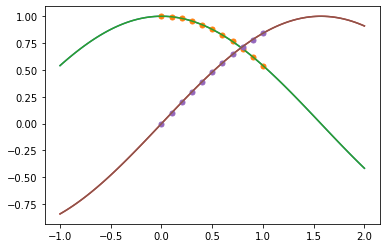

In [ ]:
#Podés pensarlos a partir de las siguientes lineas de código si querés

xi = np.linspace(0,1,11)
yic = np.cos(xi)
coseno = np.polyfit(xi,yic,10)
p_c = np.poly1d(coseno)   # El polinomio interpolador del coseno

x = np.linspace(-1,2,101)
plt.plot(x, p_c(x))
plt.plot(xi,yic,'.', ms=10)
plt.plot(x, np.cos(x))

yis = np.sin(xi)
seno = np.polyfit(xi,yis,10)
p_s= np.poly1d(seno)   # El polinomio interpolador del seno

x = np.linspace(-1,2,101)
plt.plot(x, p_s(x))
plt.plot(xi,yis,'.', ms=10)
plt.plot(x, np.sin(x))



## Más operaciones con Polinomios


- Definir un polinomio mediante sus raíces


In [ ]:
# Puedo definir un polinomio a partir de sus raíces, usando el parámetro true en la declaración de poly1d
q1 = np.poly1d([-1,1,3,5], True)
print(q1)

   4     3      2
1 x - 8 x + 14 x + 8 x - 15


In [ ]:
# Verificamos que las raíces son las que pedimos y probamos en otros puntos cualquiera
q1 = np.poly1d([-1,1,3,5], True)
print(q1(np.array([-1,1,3,5,2,-2])))

[  0.   0.   0.   0.   9. 105.]


## Un ejemplo de polinomio que lo construimos a mano con el metodo de diferencias divididas

Sabemos que interpola los puntos $\quad(1,2) \quad (3,3)\quad (4,2)\quad (8,10)\quad$ y que su fórmula resultado de nuestras cuantas a mano fue:

$P(x)=2+\dfrac{1}{2}(x-1)-\dfrac{1}{2}(x-1)(x-3)+\dfrac{11}{70}(x-1)(x-3)(x-4)$



In [ ]:
#De verificación de polinomio que construimos con diferencias divididas

p0 = np.poly1d([2])                # El polinomio constante p1 = 2
p1 = np.poly1d([1], True)          # El polinomio (x - 1) (definido por sus raíces)
p2 = np.poly1d([1,3], True)        # El polinomio (x - 1)(x-3) (definido por sus raíces)
p3 = np.poly1d([1,3,4], True)      # El polinomio (x - 1)(x-3)(x-4) (definido por sus raíces)

p = p0 + 1/2 * p1 - 1/2 * p2 + 11/70 * p3   #Construyo el polinomio que quiero verificar

print(p) 

print(p([1,3,4,8]))    # Evaluamos el polinomio resultante en los puntos de interpolación e imprimo elresultado para verficar

#print(p.c)             # Si quiero ver solo los coeficientes de p uso el comando: p.c
#print(p.r)             # Si quiero hallar las raices de p uso el comando: p.r

        3         2
0.1571 x - 1.757 x + 5.486 x - 1.886
[ 2.  3.  2. 10.]
[ 0.15714286 -1.75714286  5.48571429 -1.88571429]
[5.39540427+1.25673924j 5.39540427-1.25673924j 0.39100964+0.j        ]


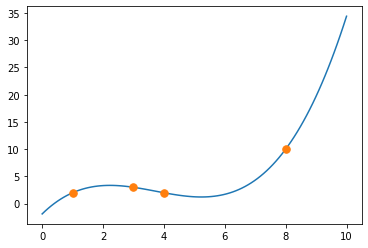

In [ ]:
# Graficamos
xi = [1, 3, 4, 8]
yi = [2, 3, 2, 10]
x=np.linspace(0,10,100)
plt.plot(x,p(x))
plt.plot(xi,yi, '.', ms=15)